# Using the QuantileTransformer to transform Bimodal Data into a Normal DIstribution

This Notebook will use the QuantileTransformer to transform data into a normal distribution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns; sns.set(color_codes=True)

from sklearn.preprocessing import QuantileTransformer

In [2]:
store_visits = pd.read_csv('Datasets/store_visits.csv')

store_visits.sample(10)

,Visits,Revenue,StoreID
270,602.834001,696.672996,0
282,537.380858,597.302344,0
296,433.164605,642.039057,0
231,470.523916,831.269252,0
228,453.696690,644.949505,0
156,916.600906,4672.004531,1
267,474.350599,588.087464,0
337,407.789637,793.328743,0
328,405.474515,721.581403,0
80,1084.839185,5476.195926,1


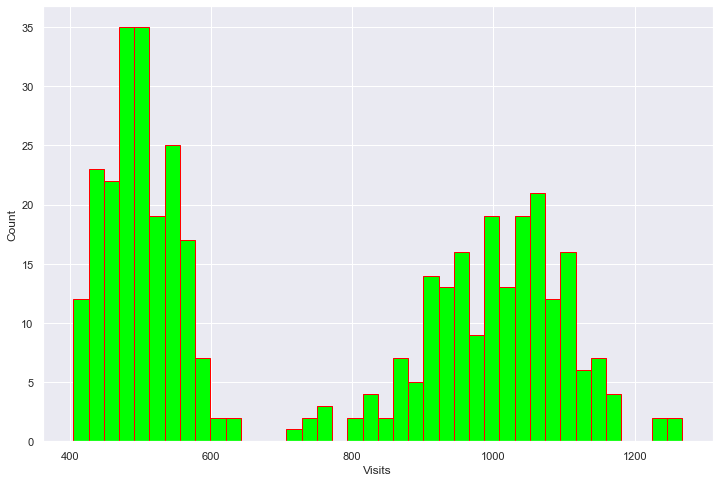

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Visits'], facecolor='lime', edgecolor='red', bins=40)

plt.xlabel('Visits')
plt.ylabel('Count')

plt.show()

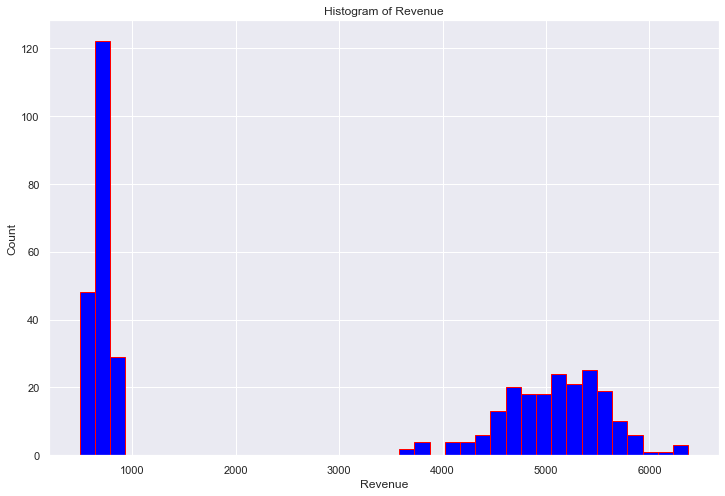

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Revenue'], facecolor='blue', edgecolor='red', bins=40)

plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

In [5]:
transformer = QuantileTransformer(output_distribution='normal')

store_transform = transformer.fit_transform(store_visits[['Visits','Revenue']])

/Users/alexandrasaavedra/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (398). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [6]:
store_transform_df = pd.DataFrame(data = store_transform,
                                  columns=['Visits_transform', 'Revenue_transform'])
store_transform_df.head()

,Visits_transform,Revenue_transform
0,0.692434,0.733135
1,0.989501,0.989501
2,0.317809,0.337797
3,0.371416,0.433038
4,1.208903,1.235553


In [7]:
final_df = pd.concat([store_visits, store_transform_df], axis=1)

final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.692434,0.733135
1,1058.607260,5349.036298,1,0.989501,0.989501
2,935.069490,4756.347453,1,0.317809,0.337797
3,952.360965,4849.804826,1,0.371416,0.433038
4,1078.384010,5467.920052,1,1.208903,1.235553


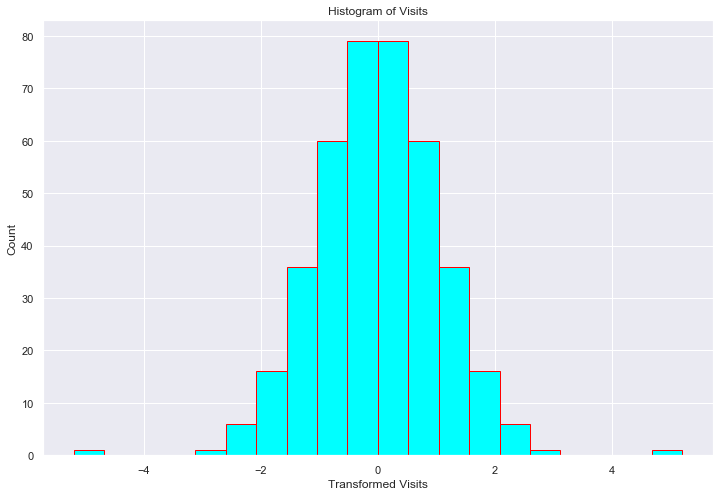

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Visits_transform'], facecolor='cyan', edgecolor='red', bins=20)

plt.xlabel('Transformed Visits')
plt.ylabel('Count')
plt.title('Histogram of Visits')

plt.show()

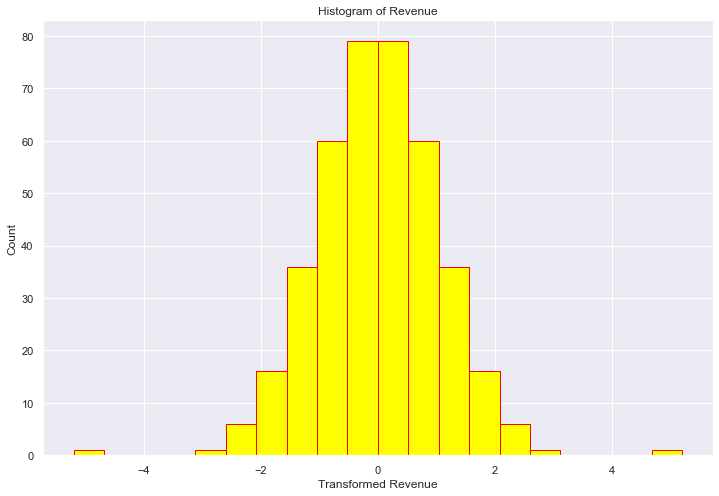

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Revenue_transform'], facecolor='yellow', edgecolor='red', bins=20)

plt.xlabel('Transformed Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

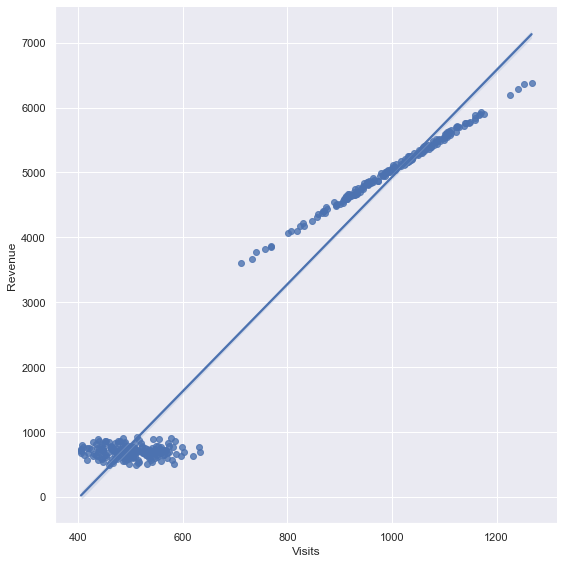

In [10]:
sns.lmplot(x="Visits", y="Revenue", data=final_df, height=8)

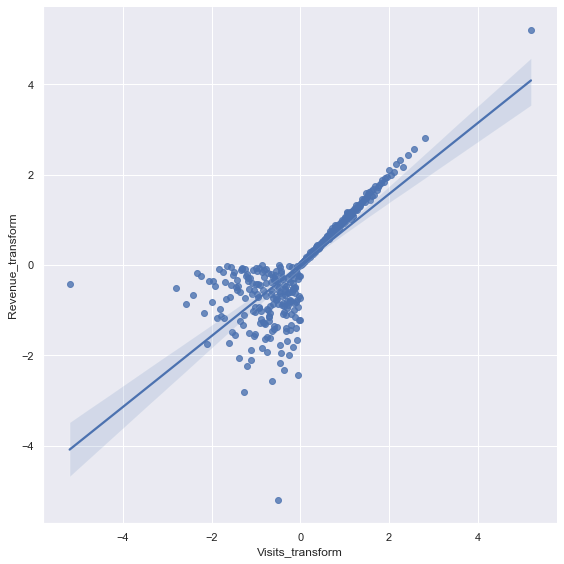

In [11]:
g = sns.lmplot(x="Visits_transform", y="Revenue_transform", data=final_df, height=8)